In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
caminho_2019 = "../dados/obitos-2019.csv"
caminho_2020 = "../dados/obitos-2020.csv"

dados_2019 = pd.read_csv(caminho_2019)
dados_2020 = pd.read_csv(caminho_2020)

print(f"2019 {dados_2019.shape}")
print(f"2020 {dados_2020.shape}")

2019 (12387, 6)
2020 (14958, 6)


In [51]:
dados_2019.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,7
1,AC,OUTRAS,DOMICILIO,< 9,M,15
2,AC,OUTRAS,HOSPITAL,< 9,F,30
3,AC,OUTRAS,HOSPITAL,< 9,M,55
4,AC,OUTRAS,IGNORADO,< 9,M,1


In [52]:
dados_2020.sample(5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
14654,PR,INSUFICIENCIA_RESPIRATORIA,HOSPITAL,N/I,M,10
7461,MG,SEPTICEMIA,IGNORADO,60 - 69,F,31
6492,RR,INDETERMINADA,HOSPITAL,50 - 59,M,1
10462,DF,OUTRAS,OUTROS_SERVICOS_SAUDE,80 - 89,I,1
8892,ES,SEPTICEMIA,HOSPITAL,70 - 79,M,358


In [53]:
print(dados_2019["uf"].unique()) # quantos elementos temos na lista
print(len(dados_2019["uf"].unique())) # temos 27 estados

['AC' 'AL' 'AM' 'AP' 'BA' 'CE' 'DF' 'ES' 'GO' 'MA' 'MG' 'MS' 'MT' 'PA'
 'PB' 'PE' 'PI' 'PR' 'RJ' 'RN' 'RO' 'RR' 'RS' 'SC' 'SE' 'SP' 'TO']
27


In [54]:
dados_2020["tipo_doenca"].unique()

array(['OUTRAS', 'COVID', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG'], dtype=object)

In [55]:
dados_2019["tipo_doenca"].value_counts() # quantos casos temos de cada doenca

OUTRAS                        3847
PNEUMONIA                     2353
INSUFICIENCIA_RESPIRATORIA    2326
SEPTICEMIA                    2065
INDETERMINADA                 1308
SRAG                           487
COVID                            1
Name: tipo_doenca, dtype: int64

In [56]:
dados_2020["tipo_doenca"].value_counts() # quantos casos temos de cada doenca

OUTRAS                        3806
INSUFICIENCIA_RESPIRATORIA    2343
PNEUMONIA                     2217
COVID                         2117
SEPTICEMIA                    2037
INDETERMINADA                 1352
SRAG                          1086
Name: tipo_doenca, dtype: int64

## Desafio 01: Acessar o portal e verificar como sao classificados os dados

## Desafio 2: Corrigir o erro do Thiago na contagem de casos

In [57]:
total_obitos_2019 = dados_2019.groupby('tipo_doenca').sum() # soma o total pq é o único dado numérico
total_obitos_2019

,total
tipo_doenca,
COVID,1
INDETERMINADA,6992
INSUFICIENCIA_RESPIRATORIA,100715
OUTRAS,661509
PNEUMONIA,226432
SEPTICEMIA,175597
SRAG,1498


In [58]:
total_obitos_2020 = dados_2020.groupby('tipo_doenca').sum() # soma o total pq é o único dado numérico
total_obitos_2020

,total
tipo_doenca,
COVID,196132
INDETERMINADA,9735
INSUFICIENCIA_RESPIRATORIA,99204
OUTRAS,692270
PNEUMONIA,182344
SEPTICEMIA,163129
SRAG,16595


Diferenca entre os anos

In [59]:
proporcao = total_obitos_2020 / total_obitos_2019
proporcao

,total
tipo_doenca,
COVID,196132.000000
INDETERMINADA,1.392305
INSUFICIENCIA_RESPIRATORIA,0.984997
OUTRAS,1.046501
PNEUMONIA,0.805293
SEPTICEMIA,0.928997
SRAG,11.078104


## Desafio 03: Explorar outras variáveis da base de dadod

## Grafico comparativo entre 2019 e 2020

In [64]:
total_obitos_2020.loc["SRAG"]

total    16595
Name: SRAG, dtype: int64

In [83]:
def grafico_comparativo(causa):
    total_2019 = dados_2019.groupby("tipo_doenca").sum()
    total_2020 = dados_2020.groupby("tipo_doenca").sum()
    lista =[int(total_2019.loc[causa]), int(total_2020.loc[causa])]
    dados = pd.DataFrame({'Total': lista, 'Ano': [2019, 2020]})

    plt.figure(figsize=(10,8))
    sns.barplot(x = "Ano", y = "Total", data = dados)
    plt.title(f"Óbitos por {causa}")
    plt.show()


    return dados

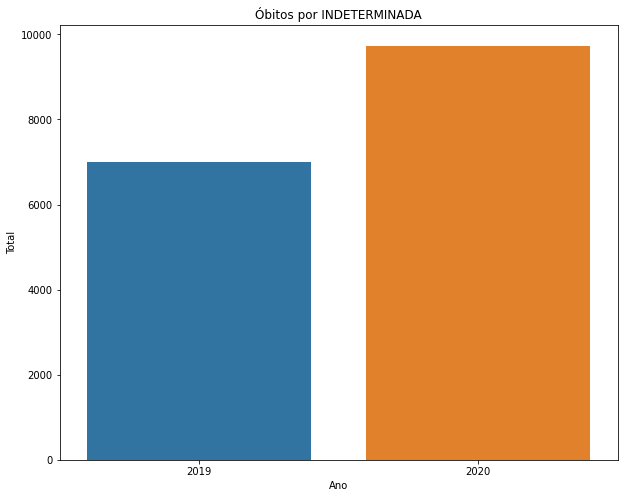

,Total,Ano
0,6992,2019
1,9735,2020


In [86]:
grafico_comparativo("INDETERMINADA")
